In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

cols = [
    'country', 'region', 'rank', 'score', 'sde', 'economy',
    'family', 'health', 'freedom', 'trust','generosity', 'disto'
]

df = pd.read_csv(r'C:\Users\Hp\Downloads\happy2015deneme.csv',names = cols)
df= df.drop([0], axis=0)
df = df.drop(columns=['rank','sde','disto'])
df.head(10)


,country,region,score,economy,family,health,freedom,trust,generosity
1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363
3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699
5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
6,Finland,Western Europe,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
7,Netherlands,Western Europe,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.4761
8,Sweden,Western Europe,7.364,1.33171,1.28907,0.91087,0.6598,0.43844,0.36262
9,New Zealand,Australia and New Zealand,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501
10,Australia,Australia and New Zealand,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562


In [3]:
df.score = df.score.astype(float)
df.economy = df.economy.astype(float)
df.family = df.family.astype(float)
df.health = df.health.astype(float)
df.freedom = df.freedom.astype(float)
df.trust = df.trust.astype(float)
df.generosity=df.generosity.astype(float)
df.dtypes

country        object
region         object
score         float64
economy       float64
family        float64
health        float64
freedom       float64
trust         float64
generosity    float64
dtype: object

In [20]:
df.groupby(['country'])[['trust']].max()

,trust
country,
Afghanistan,0.09719
Albania,0.06413
Algeria,0.17383
Angola,0.07122
Argentina,0.08484
...,...
Venezuela,0.11069
Vietnam,0.10441
Yemen,0.07854


In [4]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px

In [25]:
data = dict(type = 'choropleth', 
           locations = df['country'],
           locationmode = 'country names',
           z = df['economy'], 
           text = df['country'],
           colorbar = {'title':'score'})
layout = dict(title = 'Happiness Score 2015', 
             geo = dict(showframe = True, 
                       projection = {'type': 'natural earth'}))
map = go.Figure(data = [data], layout=layout)
iplot(map)


In [208]:
df.describe()

,score,economy,family,health,freedom,trust,generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309882
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
country       158 non-null object
region        158 non-null object
score         158 non-null float64
economy       158 non-null float64
family        158 non-null float64
health        158 non-null float64
freedom       158 non-null float64
trust         158 non-null float64
generosity    158 non-null float64
dtypes: float64(7), object(2)
memory usage: 17.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 7 columns):
score         158 non-null float64
economy       158 non-null float64
family        158 non-null float64
health        158 non-null float64
freedom       158 non-null float64
trust         158 non-null float64
generosity    158 non-null float64
dtypes: float64(7)
memory usage: 14.9 KB


In [210]:
df.isna().sum()

country       0
region        0
score         0
economy       0
family        0
health        0
freedom       0
trust         0
generosity    0
dtype: int64

In [171]:
df.groupby(['region','country'])[['score']].sum()

region-country    object
score             object
economy           object
family            object
healthy           object
freedom           object
generosity        object
trust             object
dtype: object

region-country     object
score             float64
economy           float64
family            float64
health            float64
freedom           float64
generosity        float64
trust             float64
dtype: object

In [23]:
df.groupby(['country'])[['trust']].mean().sort_values(
    'trust', ascending=False)

,trust
country,
Rwanda,0.55191
Qatar,0.52208
Singapore,0.49210
Denmark,0.48357
Sweden,0.43844
...,...
Lithuania,0.01031
Bulgaria,0.00872
Romania,0.00649


In [215]:
df['score'].max()

7.587

[Text(0, 0, 'Western Europe'),
 Text(0, 0, 'North America'),
 Text(0, 0, 'Australia and New Zealand'),
 Text(0, 0, 'Middle East and Northern Africa'),
 Text(0, 0, 'Latin America and Caribbean'),
 Text(0, 0, 'Southeastern Asia'),
 Text(0, 0, 'Central and Eastern Europe'),
 Text(0, 0, 'Eastern Asia'),
 Text(0, 0, 'Sub-Saharan Africa'),
 Text(0, 0, 'Southern Asia')]

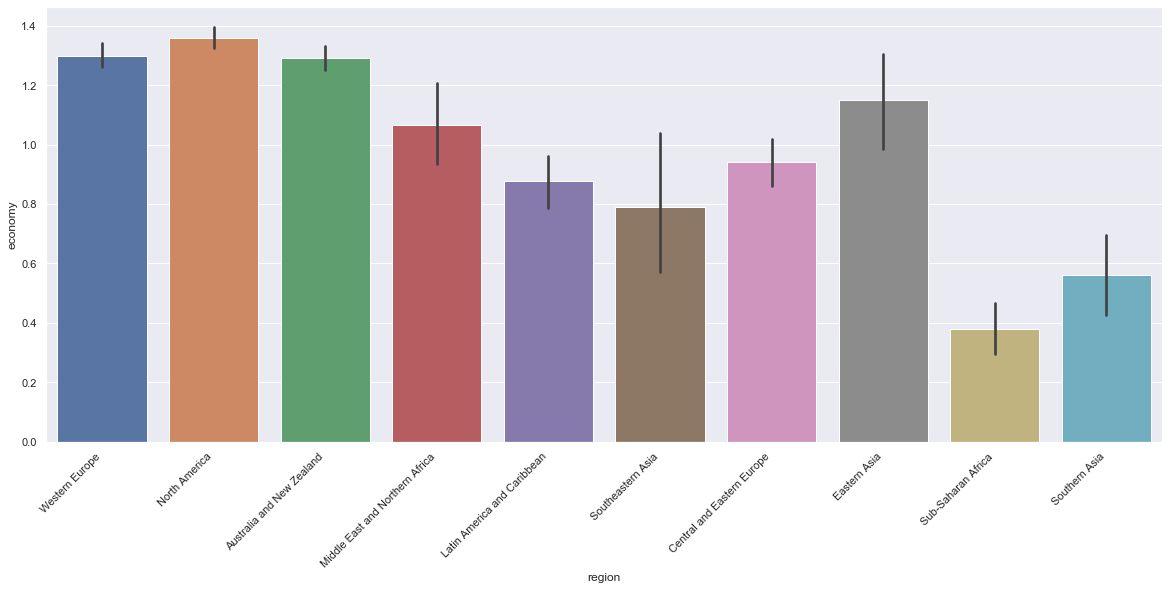

In [224]:
plt.figure(figsize=(20,8))
isim = sns.barplot(x = 'region',y='economy',data=df)
isim.set_xticklabels(isim.get_xticklabels(), rotation=45, horizontalalignment='right')



In [142]:
isim.figure.savefig("economy.jpeg")

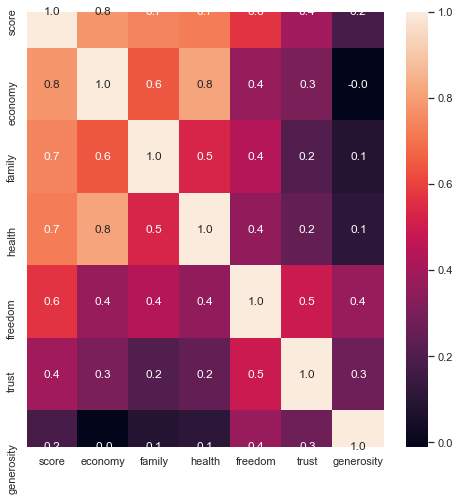

In [152]:
f,ax=plt.subplots(figsize=(8,8))
ama = sns.heatmap(dfa.corr(),annot=True,fmt='.1f',ax=ax)
plt.show()
ama.figure.savefig("ama.jpeg")

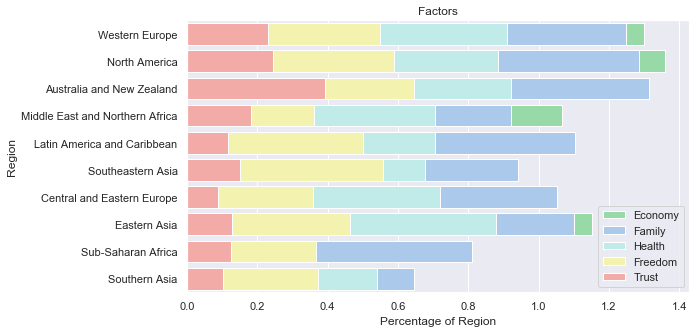

In [150]:
#Horizontal bar plot
region_lists=list(df['region'].unique())
share_economy=[]
share_family=[]
share_health=[]
share_freedom=[]
share_trust=[]
for each in region_lists:
    region=df[df['region']==each]
    share_economy.append(sum(region.economy)/len(region))
    share_family.append(sum(region.family)/len(region))
    share_health.append(sum(region.health)/len(region))
    share_freedom.append(sum(region.freedom)/len(region))
    share_trust.append(sum(region.trust)/len(region))
#Visualization
f,ax = plt.subplots(figsize = (9,5))
sns.set_color_codes("pastel")
sns.barplot(x=share_economy,y=region_lists,color='g',label="Economy")
sns.barplot(x=share_family,y=region_lists,color='b',label="Family")
sns.barplot(x=share_health,y=region_lists,color='c',label="Health")
sns.barplot(x=share_freedom,y=region_lists,color='y',label="Freedom")
sns.barplot(x=share_trust,y=region_lists,color='r',label="Trust")
ax.legend(loc="lower right",frameon = True)
ax.set(xlabel='Percentage of Region', ylabel='Region',title = "Factors")
plt.show()

[Text(0, 0, 'Western Europe'),
 Text(0, 0, 'North America'),
 Text(0, 0, 'Australia and New Zealand'),
 Text(0, 0, 'Middle East and Northern Africa'),
 Text(0, 0, 'Latin America and Caribbean'),
 Text(0, 0, 'Southeastern Asia'),
 Text(0, 0, 'Central and Eastern Europe'),
 Text(0, 0, 'Eastern Asia'),
 Text(0, 0, 'Sub-Saharan Africa'),
 Text(0, 0, 'Southern Asia')]

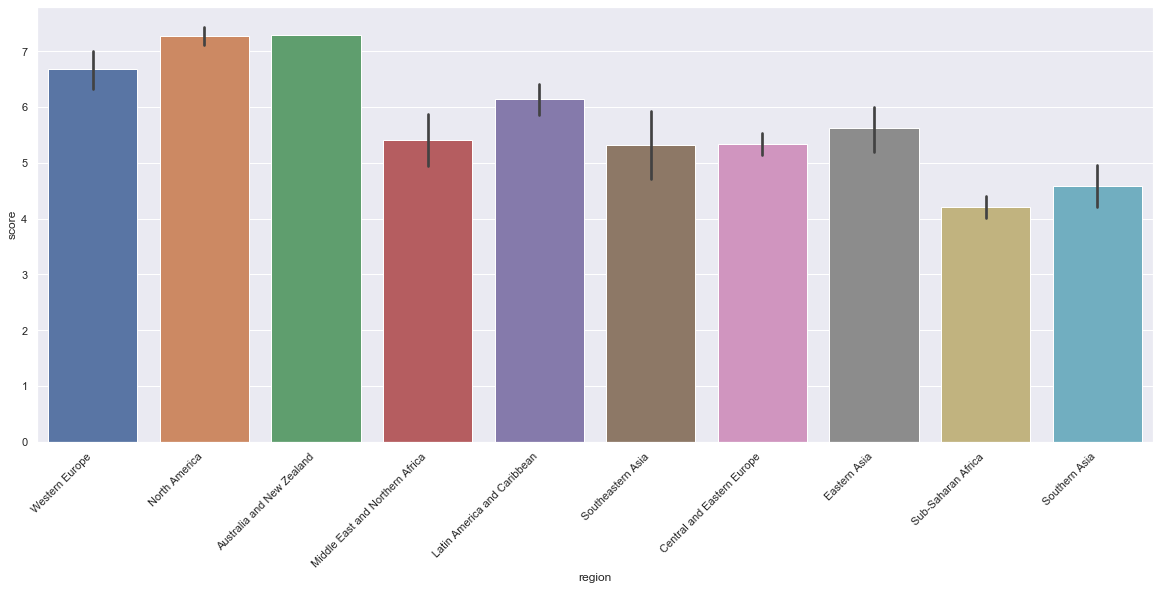

In [226]:
plt.figure(figsize=(20,8))
aba = sns.barplot(x = 'region',y='score',data=df)
aba.set_xticklabels(isim.get_xticklabels(), rotation=45, horizontalalignment='right')



In [15]:
data = dict(type = 'choropleth', 
           locations = df['country'],
           locationmode = 'country names',
           z = df['trust'], 
           text = df['country'],
           colorbar = {'title':'Trust'})
layout = dict(title = 'Trust in government', 
             geo = dict(showframe = True, 
                       projection = {'type': 'natural earth'}))
map = go.Figure(data = [data], layout=layout)
iplot(map)

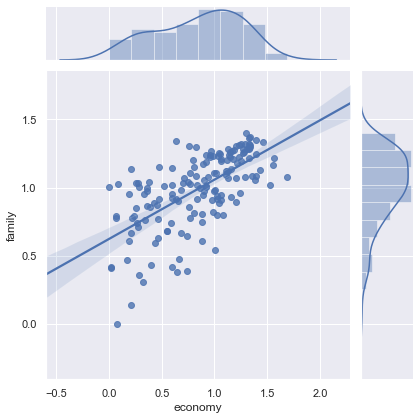

In [249]:
sns.jointplot("economy", "family", kind="regplot", data=df)

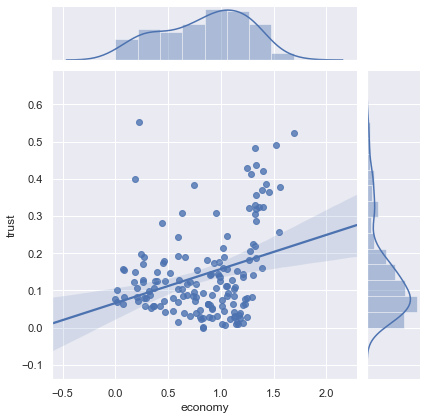

In [237]:
sns.jointplot("economy", "trust", kind="regplot", data=df)

In [17]:
datab = df.groupby(['region','country'])[['score','economy','family','health']].mean().sort_values(
    'score', ascending=False)
datab

score  economy   family   health
region                          country                                      
Western Europe                  Switzerland  7.587  1.39651  1.34951  0.94143
                                Iceland      7.561  1.30232  1.40223  0.94784
                                Denmark      7.527  1.32548  1.36058  0.87464
                                Norway       7.522  1.45900  1.33095  0.88521
North America                   Canada       7.427  1.32629  1.32261  0.90563
...                                            ...      ...      ...      ...
Sub-Saharan Africa              Rwanda       3.465  0.22208  0.77370  0.42864
                                Benin        3.340  0.28665  0.35386  0.31910
Middle East and Northern Africa Syria        3.006  0.66320  0.47489  0.72193
Sub-Saharan Africa              Burundi      2.905  0.01530  0.41587  0.22396
                                Togo         2.839  0.20868  0.13995  0.28443

[158 rows x 4 columns]

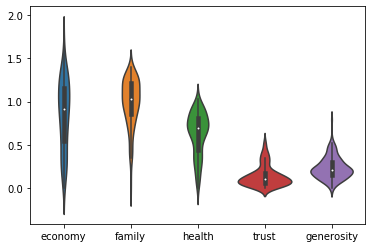

In [12]:
datac = df.groupby(['country'])[['economy','family','health','trust','generosity']].mean()

sns.violinplot(data=datac)

In [ ]:
sns.jointplot("economy", "trust", kind="regplot", data=df)

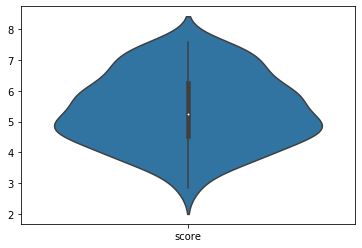

In [10]:
datac = df.groupby(['country','region'])[['score']].mean()

sns.violinplot(data=datac)